# 7.6 卷积网络分类过程可视化

### 7.6.1 导入库

网络结构由network.py提供[network.py](network.py)  
第一个隐层为含有三个节点的全连接层  
第二个隐层为含有两个1x2卷积的卷积层  
第三个隐层为池化层（最大池化）
![image.png](IMG75/1.png)

In [1]:
import network
import matplotlib.pyplot  as plt
from matplotlib.colors import ListedColormap
from matplotlib import cm,colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
np.random.seed(100)

### 7.6.2 定义各类激活函数

In [2]:
activation = 'relu'
if activation=='relu':
    activation_fn = network.relu_activation
elif activation == 'sigmoid':
    activation_fn = network.sigmoid_activation
elif activation == 'tanh':
    activation_fn = network.tanh_activation
else:
    print(activation+' function not implemented')

### 7.6.3 导入数据开始训练

根据需要设定合适的参数进行训练,net.SGD()函数参数如下:

training_data #训练数据<p>
epochs #训练次数<p>
mini_batch_size #batch大小<p>
eta #学习率<p>
lmbda = 0.0  #正则化系数<p>
evaluation_data=None #验证数据 <p>
monitor_evaluation_cost=False   #监测验证损失 <p>
monitor_evaluation_accuracy=True   #监测验证精度 <p>
monitor_training_cost=True   #监测训练损失 <p>
monitor_training_accuracy=True   #监测训练精度 <p>
early_stopping_n = 0   #早停阈值 <p>
verbose = 0   # 是否开启冗余输出，开启之后才能显示上述监测内容 <p>
save_loss=False  # 保存损失 <p>
save_delta = False # 保存误差 <p>
save_grad = False  # 保存梯度 <p>
save_weights = False # 保存训练过程中的权重 <p>
save_Pl_Pa = False #保存各层偏导 <p>

In [8]:
X, y = datasets.make_circles(n_samples=2000, factor=0.3, noise=.1,random_state=123)
X, X_test, y, y_test = train_test_split(X, y, test_size=0.33)
c,r = np.mgrid[[slice(X.min()- .2,X.max() + .2,50j)]*2]
p = np.c_[c.flat,r.flat]
#归一化
ss = StandardScaler().fit(X)
X = ss.transform(X)
p_0 = ss.transform(p)
X_test = ss.transform(X_test)
p = list(np.expand_dims(p_0,2))
#调整数据数据
training_data = list([[np.expand_dims(feature,axis=1),label] for feature,label in zip(X,y)])
test_data =  list([[np.expand_dims(feature,axis=1),label] for feature,label in zip(X_test,y_test)])
#"""全连接与卷积输入如[2,3,[3,2],1],其中的[3,2]代表卷积核为1*2,个数为卷积核数量为3"""
net = network.Network([2,3,[2,2],1],activation_fn=activation_fn,cost=network.BinaryLogCost,layers_type=['FC','C','FC'])
#是否已经训练且保存中间参数
have_trained = False
if have_trained:
    #如果已经训练了就直接加载
    weights_log = np.load('log/weights_log.npy',allow_pickle=True)
    bias_log = np.load('log/bias_log.npy',allow_pickle=True)
    net.set_weights(weights_log[800],bias_log[800])
else:
    #否则重新训练
    net.default_weight_initializer()
    _ = net.SGD(training_data, 2000, len(training_data), 0.08, evaluation_data=test_data,verbose=1,
            save_Pl_Pa=True,
            save_weights=True,
            save_grad=True,
            save_delta=True,
            save_loss=True,
    monitor_evaluation_accuracy=True,
    monitor_training_accuracy=True,
    monitor_training_cost=True)



Epoch 0 training complete
Cost on training data: 1.5129109601588913
Accuracy on training data: 683 / 1340
Accuracy on evaluation data: 317 / 660
Epoch 1 training complete
Cost on training data: 1.3974295564637578
Accuracy on training data: 683 / 1340
Accuracy on evaluation data: 317 / 660
Epoch 2 training complete
Cost on training data: 1.2955924262313778
Accuracy on training data: 683 / 1340
Accuracy on evaluation data: 317 / 660
Epoch 3 training complete
Cost on training data: 1.2051875617874535
Accuracy on training data: 683 / 1340
Accuracy on evaluation data: 317 / 660
Epoch 4 training complete
Cost on training data: 1.1249843340704626
Accuracy on training data: 683 / 1340
Accuracy on evaluation data: 317 / 660
Epoch 5 training complete
Cost on training data: 1.0536787849030627
Accuracy on training data: 683 / 1340
Accuracy on evaluation data: 317 / 660
Epoch 6 training complete
Cost on training data: 0.9901536599491472
Accuracy on training data: 683 / 1340
Accuracy on evaluation d

Epoch 57 training complete
Cost on training data: 0.4592294994635467
Accuracy on training data: 1163 / 1340
Accuracy on evaluation data: 582 / 660
Epoch 58 training complete
Cost on training data: 0.45642693257613676
Accuracy on training data: 1163 / 1340
Accuracy on evaluation data: 582 / 660
Epoch 59 training complete
Cost on training data: 0.45409021811890327
Accuracy on training data: 1164 / 1340
Accuracy on evaluation data: 582 / 660
Epoch 60 training complete
Cost on training data: 0.451752756777207
Accuracy on training data: 1172 / 1340
Accuracy on evaluation data: 586 / 660
Epoch 61 training complete
Cost on training data: 0.44897089329474865
Accuracy on training data: 1172 / 1340
Accuracy on evaluation data: 586 / 660
Epoch 62 training complete
Cost on training data: 0.44624275604529834
Accuracy on training data: 1175 / 1340
Accuracy on evaluation data: 586 / 660
Epoch 63 training complete
Cost on training data: 0.44354835553906585
Accuracy on training data: 1177 / 1340
Accura

Epoch 113 training complete
Cost on training data: 0.33163424615501963
Accuracy on training data: 1255 / 1340
Accuracy on evaluation data: 616 / 660
Epoch 114 training complete
Cost on training data: 0.32959849049656
Accuracy on training data: 1256 / 1340
Accuracy on evaluation data: 617 / 660
Epoch 115 training complete
Cost on training data: 0.3275665431678348
Accuracy on training data: 1258 / 1340
Accuracy on evaluation data: 617 / 660
Epoch 116 training complete
Cost on training data: 0.32554408344675273
Accuracy on training data: 1257 / 1340
Accuracy on evaluation data: 618 / 660
Epoch 117 training complete
Cost on training data: 0.3235137947347641
Accuracy on training data: 1259 / 1340
Accuracy on evaluation data: 618 / 660
Epoch 118 training complete
Cost on training data: 0.3214995802699518
Accuracy on training data: 1260 / 1340
Accuracy on evaluation data: 617 / 660
Epoch 119 training complete
Cost on training data: 0.31945847572213126
Accuracy on training data: 1260 / 1340
Ac

Epoch 169 training complete
Cost on training data: 0.23118461547471816
Accuracy on training data: 1299 / 1340
Accuracy on evaluation data: 640 / 660
Epoch 170 training complete
Cost on training data: 0.22972889548629052
Accuracy on training data: 1299 / 1340
Accuracy on evaluation data: 640 / 660
Epoch 171 training complete
Cost on training data: 0.22828442653960446
Accuracy on training data: 1299 / 1340
Accuracy on evaluation data: 640 / 660
Epoch 172 training complete
Cost on training data: 0.22685606807892097
Accuracy on training data: 1300 / 1340
Accuracy on evaluation data: 640 / 660
Epoch 173 training complete
Cost on training data: 0.2254387657949954
Accuracy on training data: 1300 / 1340
Accuracy on evaluation data: 640 / 660
Epoch 174 training complete
Cost on training data: 0.22403687721994098
Accuracy on training data: 1300 / 1340
Accuracy on evaluation data: 640 / 660
Epoch 175 training complete
Cost on training data: 0.2226510800941055
Accuracy on training data: 1300 / 134

Epoch 225 training complete
Cost on training data: 0.16885630537440555
Accuracy on training data: 1322 / 1340
Accuracy on evaluation data: 651 / 660
Epoch 226 training complete
Cost on training data: 0.1680382331011843
Accuracy on training data: 1322 / 1340
Accuracy on evaluation data: 651 / 660
Epoch 227 training complete
Cost on training data: 0.167229794006868
Accuracy on training data: 1322 / 1340
Accuracy on evaluation data: 651 / 660
Epoch 228 training complete
Cost on training data: 0.1664293714368
Accuracy on training data: 1322 / 1340
Accuracy on evaluation data: 651 / 660
Epoch 229 training complete
Cost on training data: 0.16563651817332906
Accuracy on training data: 1322 / 1340
Accuracy on evaluation data: 651 / 660
Epoch 230 training complete
Cost on training data: 0.1648496277225369
Accuracy on training data: 1322 / 1340
Accuracy on evaluation data: 651 / 660
Epoch 231 training complete
Cost on training data: 0.16406507380811697
Accuracy on training data: 1322 / 1340
Accu

Epoch 281 training complete
Cost on training data: 0.1327521109567845
Accuracy on training data: 1329 / 1340
Accuracy on evaluation data: 655 / 660
Epoch 282 training complete
Cost on training data: 0.13224323516397057
Accuracy on training data: 1329 / 1340
Accuracy on evaluation data: 655 / 660
Epoch 283 training complete
Cost on training data: 0.13173845252002075
Accuracy on training data: 1329 / 1340
Accuracy on evaluation data: 655 / 660
Epoch 284 training complete
Cost on training data: 0.1312376966294429
Accuracy on training data: 1329 / 1340
Accuracy on evaluation data: 655 / 660
Epoch 285 training complete
Cost on training data: 0.13074090376629294
Accuracy on training data: 1329 / 1340
Accuracy on evaluation data: 655 / 660
Epoch 286 training complete
Cost on training data: 0.13024801269487452
Accuracy on training data: 1329 / 1340
Accuracy on evaluation data: 655 / 660
Epoch 287 training complete
Cost on training data: 0.12975896450462013
Accuracy on training data: 1329 / 134

Accuracy on evaluation data: 655 / 660
Epoch 337 training complete
Cost on training data: 0.10932029825395694
Accuracy on training data: 1329 / 1340
Accuracy on evaluation data: 655 / 660
Epoch 338 training complete
Cost on training data: 0.10897827476488922
Accuracy on training data: 1329 / 1340
Accuracy on evaluation data: 655 / 660
Epoch 339 training complete
Cost on training data: 0.10863842504825845
Accuracy on training data: 1329 / 1340
Accuracy on evaluation data: 655 / 660
Epoch 340 training complete
Cost on training data: 0.10830068624994706
Accuracy on training data: 1329 / 1340
Accuracy on evaluation data: 655 / 660
Epoch 341 training complete
Cost on training data: 0.10796438386765009
Accuracy on training data: 1329 / 1340
Accuracy on evaluation data: 655 / 660
Epoch 342 training complete
Cost on training data: 0.10763021062325961
Accuracy on training data: 1329 / 1340
Accuracy on evaluation data: 655 / 660
Epoch 343 training complete
Cost on training data: 0.10729815683859

Epoch 392 training complete
Cost on training data: 0.09332618887652697
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 656 / 660
Epoch 393 training complete
Cost on training data: 0.09308120644543924
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 656 / 660
Epoch 394 training complete
Cost on training data: 0.09283756604306106
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 656 / 660
Epoch 395 training complete
Cost on training data: 0.09259513986166466
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 656 / 660
Epoch 396 training complete
Cost on training data: 0.09235400619329534
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 656 / 660
Epoch 397 training complete
Cost on training data: 0.09211405072483225
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 656 / 660
Epoch 398 training complete
Cost on training data: 0.09187542394168303
Accuracy on training data: 1330 / 1

Epoch 448 training complete
Cost on training data: 0.08144348285882949
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 656 / 660
Epoch 449 training complete
Cost on training data: 0.08126121776987813
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 656 / 660
Epoch 450 training complete
Cost on training data: 0.0810800092227927
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 656 / 660
Epoch 451 training complete
Cost on training data: 0.08089968097124974
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 656 / 660
Epoch 452 training complete
Cost on training data: 0.08072022609283767
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 656 / 660
Epoch 453 training complete
Cost on training data: 0.08054163784109371
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 656 / 660
Epoch 454 training complete
Cost on training data: 0.08036390962647343
Accuracy on training data: 1330 / 13

Epoch 504 training complete
Cost on training data: 0.07242579505036123
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 656 / 660
Epoch 505 training complete
Cost on training data: 0.07228444341048587
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 656 / 660
Epoch 506 training complete
Cost on training data: 0.07214369611721586
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 656 / 660
Epoch 507 training complete
Cost on training data: 0.0720035492348
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 656 / 660
Epoch 508 training complete
Cost on training data: 0.071863998877703
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 656 / 660
Epoch 509 training complete
Cost on training data: 0.07172504120792277
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 656 / 660
Epoch 510 training complete
Cost on training data: 0.07158667243265442
Accuracy on training data: 1330 / 1340
Ac

Epoch 560 training complete
Cost on training data: 0.06535906147191319
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 656 / 660
Epoch 561 training complete
Cost on training data: 0.06524702668552787
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 656 / 660
Epoch 562 training complete
Cost on training data: 0.06513542347158419
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 656 / 660
Epoch 563 training complete
Cost on training data: 0.06502424896629819
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 656 / 660
Epoch 564 training complete
Cost on training data: 0.06491350039782626
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 656 / 660
Epoch 565 training complete
Cost on training data: 0.06480317507389348
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 656 / 660
Epoch 566 training complete
Cost on training data: 0.06469327037146633
Accuracy on training data: 1330 / 1

Epoch 615 training complete
Cost on training data: 0.059779274480283646
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 656 / 660
Epoch 616 training complete
Cost on training data: 0.0596878492048412
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 656 / 660
Epoch 617 training complete
Cost on training data: 0.05959674624844813
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 656 / 660
Epoch 618 training complete
Cost on training data: 0.059505963492800164
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 656 / 660
Epoch 619 training complete
Cost on training data: 0.059415498895952115
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 656 / 660
Epoch 620 training complete
Cost on training data: 0.05932535048242263
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 656 / 660
Epoch 621 training complete
Cost on training data: 0.05923552216582847
Accuracy on training data: 1330 /

Epoch 670 training complete
Cost on training data: 0.05519437024919469
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 656 / 660
Epoch 671 training complete
Cost on training data: 0.05511861670235082
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 656 / 660
Epoch 672 training complete
Cost on training data: 0.05504310525655748
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 656 / 660
Epoch 673 training complete
Cost on training data: 0.05496783464844738
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 656 / 660
Epoch 674 training complete
Cost on training data: 0.05489277208674564
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 656 / 660
Epoch 675 training complete
Cost on training data: 0.05481782085603673
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 656 / 660
Epoch 676 training complete
Cost on training data: 0.05474310853486335
Accuracy on training data: 1330 / 1

Epoch 725 training complete
Cost on training data: 0.051357356986718304
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 657 / 660
Epoch 726 training complete
Cost on training data: 0.05129334544635886
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 657 / 660
Epoch 727 training complete
Cost on training data: 0.05122952109566887
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 657 / 660
Epoch 728 training complete
Cost on training data: 0.05116588311240387
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 657 / 660
Epoch 729 training complete
Cost on training data: 0.05110243067973726
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 657 / 660
Epoch 730 training complete
Cost on training data: 0.05103916298616792
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 657 / 660
Epoch 731 training complete
Cost on training data: 0.050976079225433624
Accuracy on training data: 1330 /

Epoch 780 training complete
Cost on training data: 0.04810108559478958
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 657 / 660
Epoch 781 training complete
Cost on training data: 0.04804644571807472
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 657 / 660
Epoch 782 training complete
Cost on training data: 0.04799195376348704
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 657 / 660
Epoch 783 training complete
Cost on training data: 0.047937609110196636
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 657 / 660
Epoch 784 training complete
Cost on training data: 0.047883411143164537
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 657 / 660
Epoch 785 training complete
Cost on training data: 0.04782935925283074
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 657 / 660
Epoch 786 training complete
Cost on training data: 0.047775452834822214
Accuracy on training data: 1330 

Epoch 835 training complete
Cost on training data: 0.04530225472138599
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 657 / 660
Epoch 836 training complete
Cost on training data: 0.045254990555036935
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 657 / 660
Epoch 837 training complete
Cost on training data: 0.045207845351658435
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 657 / 660
Epoch 838 training complete
Cost on training data: 0.04516081865430806
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 657 / 660
Epoch 839 training complete
Cost on training data: 0.04511391000950325
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 657 / 660
Epoch 840 training complete
Cost on training data: 0.04506711896703414
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 657 / 660
Epoch 841 training complete
Cost on training data: 0.045020445079821905
Accuracy on training data: 1330 

Epoch 890 training complete
Cost on training data: 0.04286963539128135
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 891 training complete
Cost on training data: 0.042828339378455406
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 892 training complete
Cost on training data: 0.042787140490156944
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 893 training complete
Cost on training data: 0.04274603838294048
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 894 training complete
Cost on training data: 0.042705032715091316
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 895 training complete
Cost on training data: 0.04266412314660086
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 896 training complete
Cost on training data: 0.04262330933914657
Accuracy on training data: 1330 

Epoch 945 training complete
Cost on training data: 0.040734109496140376
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 946 training complete
Cost on training data: 0.0406976856322017
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 947 training complete
Cost on training data: 0.040661342211864474
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 948 training complete
Cost on training data: 0.040625078968618215
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 949 training complete
Cost on training data: 0.040588895637123736
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 950 training complete
Cost on training data: 0.04055279195320409
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 951 training complete
Cost on training data: 0.04051676765384382
Accuracy on training data: 1330 

Epoch 1000 training complete
Cost on training data: 0.038843078424728956
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1001 training complete
Cost on training data: 0.03881070287824002
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1002 training complete
Cost on training data: 0.038778395146833386
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1003 training complete
Cost on training data: 0.03874615496627862
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1004 training complete
Cost on training data: 0.03871398207971129
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1005 training complete
Cost on training data: 0.0386818762368011
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1006 training complete
Cost on training data: 0.03864983719303565
Accuracy on training data: 

Epoch 1055 training complete
Cost on training data: 0.037157462739413394
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1056 training complete
Cost on training data: 0.03712851650133921
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1057 training complete
Cost on training data: 0.03709962812479644
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1058 training complete
Cost on training data: 0.0370707973053745
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1059 training complete
Cost on training data: 0.037042023757699015
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1060 training complete
Cost on training data: 0.03701330721287908
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1061 training complete
Cost on training data: 0.03698464741631681
Accuracy on training data: 

Epoch 1110 training complete
Cost on training data: 0.035646515989831394
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1111 training complete
Cost on training data: 0.03562051306348624
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1112 training complete
Cost on training data: 0.035594558945076016
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1113 training complete
Cost on training data: 0.0355686534482912
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1114 training complete
Cost on training data: 0.035542796392767285
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1115 training complete
Cost on training data: 0.03551698760344037
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1116 training complete
Cost on training data: 0.035491226909977115
Accuracy on training data

Epoch 1165 training complete
Cost on training data: 0.034284314146458134
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1166 training complete
Cost on training data: 0.03426077203416562
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1167 training complete
Cost on training data: 0.03423727161114935
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1168 training complete
Cost on training data: 0.03421381275832328
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1169 training complete
Cost on training data: 0.03419039535756365
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1170 training complete
Cost on training data: 0.03416701929165999
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1171 training complete
Cost on training data: 0.03414368444426935
Accuracy on training data: 

Accuracy on evaluation data: 658 / 660
Epoch 1220 training complete
Cost on training data: 0.033048420973129926
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1221 training complete
Cost on training data: 0.03302700712055113
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1222 training complete
Cost on training data: 0.033005629272099705
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1223 training complete
Cost on training data: 0.032984287335605496
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1224 training complete
Cost on training data: 0.032962981219228006
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1225 training complete
Cost on training data: 0.03294171083145841
Accuracy on training data: 1330 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1226 training complete
Cost on training data: 0.032

Epoch 1275 training complete
Cost on training data: 0.03192176034177171
Accuracy on training data: 1331 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1276 training complete
Cost on training data: 0.03190219623158403
Accuracy on training data: 1331 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1277 training complete
Cost on training data: 0.031882663496491874
Accuracy on training data: 1331 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1278 training complete
Cost on training data: 0.03186316205973299
Accuracy on training data: 1331 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1279 training complete
Cost on training data: 0.0318436918448246
Accuracy on training data: 1331 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1280 training complete
Cost on training data: 0.031824252775561356
Accuracy on training data: 1331 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1281 training complete
Cost on training data: 0.03180484477601251
Accuracy on training data: 

Epoch 1330 training complete
Cost on training data: 0.030887507489055586
Accuracy on training data: 1333 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1331 training complete
Cost on training data: 0.030869494004191356
Accuracy on training data: 1333 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1332 training complete
Cost on training data: 0.030851508140620373
Accuracy on training data: 1333 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1333 training complete
Cost on training data: 0.030833549831890617
Accuracy on training data: 1333 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1334 training complete
Cost on training data: 0.030815619011884406
Accuracy on training data: 1333 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1335 training complete
Cost on training data: 0.030797715614809505
Accuracy on training data: 1333 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1336 training complete
Cost on training data: 0.030779839575184997
Accuracy on training 

Epoch 1385 training complete
Cost on training data: 0.029937405640534123
Accuracy on training data: 1333 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1386 training complete
Cost on training data: 0.029920852289556443
Accuracy on training data: 1333 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1387 training complete
Cost on training data: 0.02990432316112459
Accuracy on training data: 1333 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1388 training complete
Cost on training data: 0.029887818200311857
Accuracy on training data: 1333 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1389 training complete
Cost on training data: 0.02987133735245681
Accuracy on training data: 1333 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1390 training complete
Cost on training data: 0.029854880563152577
Accuracy on training data: 1333 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1391 training complete
Cost on training data: 0.029838447778231768
Accuracy on training da

Epoch 1440 training complete
Cost on training data: 0.029061943407606067
Accuracy on training data: 1332 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1441 training complete
Cost on training data: 0.029046657199349783
Accuracy on training data: 1332 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1442 training complete
Cost on training data: 0.02903133128431886
Accuracy on training data: 1332 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1443 training complete
Cost on training data: 0.029015737448147446
Accuracy on training data: 1332 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1444 training complete
Cost on training data: 0.02900017838701067
Accuracy on training data: 1332 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1445 training complete
Cost on training data: 0.028984652735406617
Accuracy on training data: 1332 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1446 training complete
Cost on training data: 0.028969159278011105
Accuracy on training da

Epoch 1495 training complete
Cost on training data: 0.028240487731037933
Accuracy on training data: 1332 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1496 training complete
Cost on training data: 0.028226152649480474
Accuracy on training data: 1332 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1497 training complete
Cost on training data: 0.0282118372659613
Accuracy on training data: 1332 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1498 training complete
Cost on training data: 0.028197541527480816
Accuracy on training data: 1332 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1499 training complete
Cost on training data: 0.0281832653819096
Accuracy on training data: 1332 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1500 training complete
Cost on training data: 0.028169008777919956
Accuracy on training data: 1332 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1501 training complete
Cost on training data: 0.02815477166493042
Accuracy on training data:

Epoch 1550 training complete
Cost on training data: 0.027480428139004445
Accuracy on training data: 1332 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1551 training complete
Cost on training data: 0.027467122962292638
Accuracy on training data: 1332 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1552 training complete
Cost on training data: 0.0274538351535924
Accuracy on training data: 1332 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1553 training complete
Cost on training data: 0.027440564674819812
Accuracy on training data: 1332 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1554 training complete
Cost on training data: 0.027427311488113646
Accuracy on training data: 1332 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1555 training complete
Cost on training data: 0.027414075555830135
Accuracy on training data: 1332 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1556 training complete
Cost on training data: 0.027400856840530924
Accuracy on training da

Epoch 1605 training complete
Cost on training data: 0.026765039506477052
Accuracy on training data: 1332 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1606 training complete
Cost on training data: 0.0267523424855257
Accuracy on training data: 1332 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1607 training complete
Cost on training data: 0.026739665259021866
Accuracy on training data: 1332 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1608 training complete
Cost on training data: 0.026727007661126973
Accuracy on training data: 1332 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1609 training complete
Cost on training data: 0.026714369532404223
Accuracy on training data: 1332 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1610 training complete
Cost on training data: 0.026701750719396546
Accuracy on training data: 1332 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1611 training complete
Cost on training data: 0.026689151074248706
Accuracy on training da

Accuracy on evaluation data: 658 / 660
Epoch 1660 training complete
Cost on training data: 0.026093079196325992
Accuracy on training data: 1332 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1661 training complete
Cost on training data: 0.02608131664308935
Accuracy on training data: 1332 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1662 training complete
Cost on training data: 0.02606956916652626
Accuracy on training data: 1332 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1663 training complete
Cost on training data: 0.02605783671898744
Accuracy on training data: 1332 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1664 training complete
Cost on training data: 0.02604611925345223
Accuracy on training data: 1332 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1665 training complete
Cost on training data: 0.02603441672350941
Accuracy on training data: 1332 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1666 training complete
Cost on training data: 0.026022

Epoch 1715 training complete
Cost on training data: 0.025467484904907568
Accuracy on training data: 1333 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1716 training complete
Cost on training data: 0.025456498433130196
Accuracy on training data: 1333 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1717 training complete
Cost on training data: 0.025445525038697955
Accuracy on training data: 1333 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1718 training complete
Cost on training data: 0.025434564687942432
Accuracy on training data: 1333 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1719 training complete
Cost on training data: 0.02542361734808392
Accuracy on training data: 1333 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1720 training complete
Cost on training data: 0.02541259329037718
Accuracy on training data: 1333 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1721 training complete
Cost on training data: 0.0254007821934175
Accuracy on training data

Accuracy on evaluation data: 658 / 660
Epoch 1770 training complete
Cost on training data: 0.024853204316609836
Accuracy on training data: 1333 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1771 training complete
Cost on training data: 0.024842513610716214
Accuracy on training data: 1333 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1772 training complete
Cost on training data: 0.024831838731439765
Accuracy on training data: 1333 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1773 training complete
Cost on training data: 0.02482117955882708
Accuracy on training data: 1333 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1774 training complete
Cost on training data: 0.02481053597616761
Accuracy on training data: 1333 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1775 training complete
Cost on training data: 0.024799907869857498
Accuracy on training data: 1333 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1776 training complete
Cost on training data: 0.024

Epoch 1825 training complete
Cost on training data: 0.02428652133585705
Accuracy on training data: 1334 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1826 training complete
Cost on training data: 0.024276585730510385
Accuracy on training data: 1334 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1827 training complete
Cost on training data: 0.024266662015906555
Accuracy on training data: 1334 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1828 training complete
Cost on training data: 0.024256750152542358
Accuracy on training data: 1334 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1829 training complete
Cost on training data: 0.024246850101543933
Accuracy on training data: 1334 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1830 training complete
Cost on training data: 0.024236961824635823
Accuracy on training data: 1334 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1831 training complete
Cost on training data: 0.024227085284118554
Accuracy on training d

Epoch 1880 training complete
Cost on training data: 0.023744834237582717
Accuracy on training data: 1334 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1881 training complete
Cost on training data: 0.023735184608048573
Accuracy on training data: 1334 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1882 training complete
Cost on training data: 0.023725549293774312
Accuracy on training data: 1334 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1883 training complete
Cost on training data: 0.023715928162387045
Accuracy on training data: 1334 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1884 training complete
Cost on training data: 0.023706321086514107
Accuracy on training data: 1334 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1885 training complete
Cost on training data: 0.023696727943442016
Accuracy on training data: 1334 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1886 training complete
Cost on training data: 0.023687148614817195
Accuracy on training 

Epoch 1935 training complete
Cost on training data: 0.023233060305882538
Accuracy on training data: 1334 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1936 training complete
Cost on training data: 0.02322407990165181
Accuracy on training data: 1334 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1937 training complete
Cost on training data: 0.023215114162055347
Accuracy on training data: 1334 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1938 training complete
Cost on training data: 0.023206162835520096
Accuracy on training data: 1334 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1939 training complete
Cost on training data: 0.02319722189797775
Accuracy on training data: 1334 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1940 training complete
Cost on training data: 0.02318829130227076
Accuracy on training data: 1334 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1941 training complete
Cost on training data: 0.023179371003254016
Accuracy on training dat

Accuracy on evaluation data: 658 / 660
Epoch 1990 training complete
Cost on training data: 0.022754208194494186
Accuracy on training data: 1334 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1991 training complete
Cost on training data: 0.022745763794535235
Accuracy on training data: 1334 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1992 training complete
Cost on training data: 0.022737328314212532
Accuracy on training data: 1334 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1993 training complete
Cost on training data: 0.022728901733893893
Accuracy on training data: 1334 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1994 training complete
Cost on training data: 0.022720484034095916
Accuracy on training data: 1334 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1995 training complete
Cost on training data: 0.022712075195482576
Accuracy on training data: 1334 / 1340
Accuracy on evaluation data: 658 / 660
Epoch 1996 training complete
Cost on training data: 0.0

### 7.6.4 可视化实验数据及实验结果

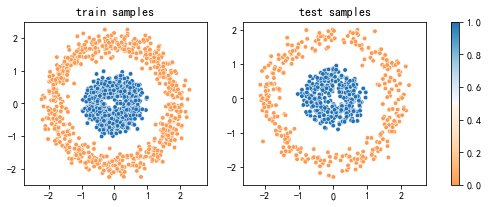

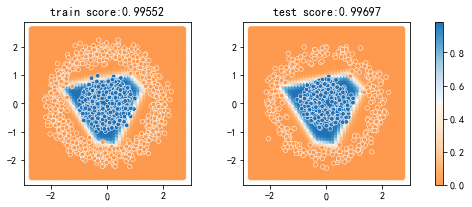

In [9]:
fig = plt.figure(figsize = (9,3))
#自定义cmap
top = cm.get_cmap('Oranges_r', 512)
bottom = cm.get_cmap('Blues', 512)
newcolors = np.vstack((top(np.linspace(0.55, 1, 512)),
                       bottom(np.linspace(0, 0.75, 512))))
cm_bright = ListedColormap(newcolors, name='OrangeBlue')
plt.subplot(121)
m1 = plt.scatter(*X.T,c = y,cmap = cm_bright,edgecolors='white',s = 20,linewidths = 0.5)
plt.title('train samples')
plt.axis('equal')
plt.subplot(122)
m2 = plt.scatter(*X_test.T,c = y_test,cmap = cm_bright,edgecolors='white',s = 20,linewidths = 0.5);
plt.title('test samples')
plt.axis('equal')
ax = fig.get_axes()
plt.colorbar(ax = ax);
plt.show();

prob = np.squeeze(net.predict_pro(p))
p1 = np.array([np.squeeze(pp) for pp in p])
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(9, 3),subplot_kw = {'aspect':'equal'})
ax1.scatter(*p1.T,c = prob,cmap = cm_bright)
ax1.scatter(*X.T,c = y,cmap = cm_bright,edgecolors='white',s = 20,linewidths = 0.5)
ax1.set_title('train score:%.5f'%net.accuracy(training_data,convert=True))
mp = ax2.scatter(*p1.T,c = prob,cmap = cm_bright)
ax2.scatter(*X_test.T,c = y_test,cmap = cm_bright,edgecolors='white',s = 20,linewidths = 0.5)
ax2.set_title('test score:%.5f'%net.accuracy(test_data,convert=True));
plt.colorbar(mp,ax = [ax1,ax2]);

### 7.6.5 定义逐层可视化函数

In [10]:
def scatter(p, c, X, wb=None, cmap='Set3', value=True, zero_start=True):
    global y
    cols = p.shape[-1]
    #     assert cols in (1,2,3)
    fig = plt.figure(figsize=(6, 4))
    c_u = np.unique(c)

    if cols > 3:
        ax = plt.gca()
        ax.axis('equal')
        if wb is not None:
            a1, a2 = p.min(0)[:2] - 0.2
            b1, b2 = p.max(0)[:2] + 0.2
            (u1, u2, *_), b_ = wb
            y1, y2 = (a1 * u1 + b_) / (-u2), (b1 * u1 + b_) / (-u2)
            ax.plot([a1, b1], [y1, y2], 'k--')
            ax.set_ylim(a2, b2)

        st = ax.scatter(*p[:, :2].T, c=c, cmap=cmap)
        ax.scatter(*X[:, :2].T, c=y, alpha=0.7, cmap=cm_bright, edgecolors='white', s=20, linewidths=0.5)
        if value:
            fig.colorbar(st,shrink=0.8)
        else:
            if zero_start:
                fig.colorbar(st, ticks=np.linspace(0, c_u.shape[0] - 1, c_u.shape[0]),shrink=0.8)
            else:
                fig.colorbar(st, ticks=c_u,shrink=0.8)

        ax.set_xlabel('X')
        ax.set_ylabel('Y')

        return ax


    elif cols == 3:
        ax3d = Axes3D(fig)
        if wb is not None:
            (u1, u2, u3), b_ = wb
            a1, a2, a3 = p.min(0)[:3]
            b1, b2, b3 = p.max(0)[:3]
            if u3!=0:
                a, b = np.mgrid[a1 - 1:b1:10j, a2 - 1:b2:10j]
                z_ = (a * u1 + b * u2 + b_) / (-u3)
            else:
                if np.abs(u1)>np.abs(u2):
                    b, z_ = np.mgrid[a2-1:b2:10j,a3-1:b3:10j]
                    a = (b*u2+b_)/(-u1)
                else:
                    a,z_ = np.mgrid[a1-1:b1:10j,a3-1:b3:10j]
                    b = (a*u1+b_)/(-u2)
            wf = ax3d.plot_wireframe(a, b, z_)
            wf.set_color('k')

        mp = ax3d.scatter(*(p.T), c=c, cmap=cmap)
        ax3d.scatter(*X.T, c=y, cmap=cm_bright, edgecolors='white', s=40, linewidths=0.5)

        if value:
            fig.colorbar(mp, shrink=0.8)
        else:
            if zero_start:
                fig.colorbar(mp, shrink=0.8, ticks=np.linspace(0, c_u.shape[0] - 1, c_u.shape[0]))
            else:
                fig.colorbar(mp, ticks=c_u,shrink=0.8)

        ax3d.set_xlabel('X')
        ax3d.set_ylabel('Y')
        ax3d.set_zlabel('Z')
        return ax3d

    elif cols == 2:
        ax = plt.gca()
        ax.axis('equal')
        if wb is not None:
            a1, a2 = p.min(0) - 0.2
            b1, b2 = p.max(0) + 0.2
            (u1, u2), b_ = wb
            y1, y2 = (a1 * u1 + b_) / (-u2), (b1 * u1 + b_) / (-u2)
            ax.plot([a1, b1], [y1, y2], 'r--')
            ax.set_ylim(a2, b2)

        st = ax.scatter(*p.T, c=c, cmap=cmap)
        ax.scatter(*X.T, c=y, alpha=0.7, cmap=cm_bright, edgecolors='white', s=20, linewidths=0.5)
        if value:
            fig.colorbar(st,shrink=0.8)
        else:
            if zero_start:
                fig.colorbar(st, ticks=np.linspace(0, c_u.shape[0] - 1, c_u.shape[0]),shrink=0.8)
            else:
                fig.colorbar(st, ticks=c_u,shrink=0.8)

        ax.set_xlabel('X')
        ax.set_ylabel('Y')


    else:
        ax = plt.gca()
        t, tt = np.zeros_like(p.flat), np.zeros_like(X.flat)
        st = plt.scatter(p.flat, t, c=c, cmap=cmap)
        ax.scatter(X.flat, tt, c=y, alpha=0.7, cmap=cm_bright, edgecolors='white', s=20, linewidths=0.5)
        if value:
            fig.colorbar(st,shrink=0.8)
        else:
            if zero_start:
                fig.colorbar(st, ticks=np.linspace(0, c_u.shape[0] - 1, c_u.shape[0]),shrink=0.8)
            else:
                fig.colorbar(st, ticks=c_u,shrink=0.8)
    return ax

def add_hyperplane(ax,p,wb,color='gray'):
    #添加超平面
    cols = p.shape[-1]
    assert cols in [2,3]
    if cols==3:
        a1, a2 = p.min(0)[:2]
        b1, b2 = p.max(0)[:2]
        a, b = np.mgrid[a1 - 1:b1:10j, a2 - 1:b2:10j]
        (u1, u2, u3), b_ = wb
        z_ = (a * u1 + b * u2 + b_) / (-u3)
        ax.plot_wireframe(a,b,z_,color=color)
    else:
        a1, a2 = p.min(0) - 0.2
        b1, b2 = p.max(0) + 0.2
        (u1, u2), b_ = wb
        y1, y2 = (a1 * u1 + b_) / (-u2), (b1 * u1 + b_) / (-u2)
        ax.plot([a1, b1], [y1, y2], color=color)
    return ax

def mapping(code):
    # 转化为01编码的类型
    numMap = np.zeros(code.shape[0])
    uniq = np.unique(code, axis=0)
    for i, arr in enumerate(uniq):
        m = (np.sum(code == arr, axis=1) == code.shape[-1])
        numMap[m] = i
    return numMap

color_list = ['aquamarine', 'b', 'blueviolet','c', 'chartreuse',
 'darkcyan', 'darkgreen', 'darkkhaki', 'deeppink', 'deepskyblue',
 'gold', 'indigo', 'lightcoral', 'maroon', 'navy', 'olivedrab', 'peru',
 'pink', 'rosybrown', 'saddlebrown', 'slategray', 'steelblue', 'teal',
 'thistle', 'violet', 'y', 'yellow']
cmap = colors.ListedColormap(color_list)

### 7.6.6 卷积网络分类过程逐层可视化

<IPython.core.display.Javascript object>


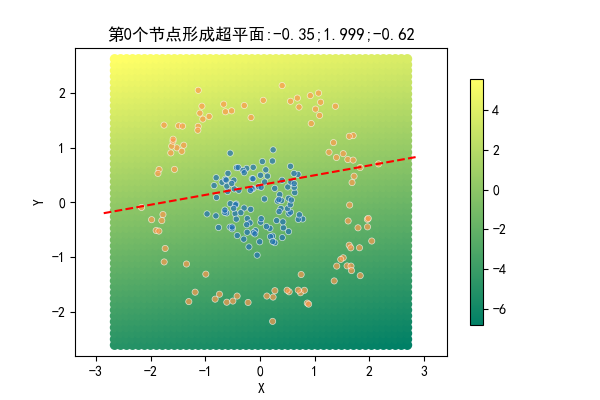

<IPython.core.display.Javascript object>


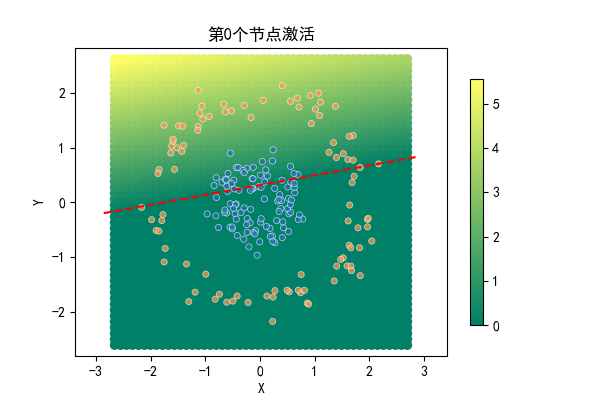

<IPython.core.display.Javascript object>


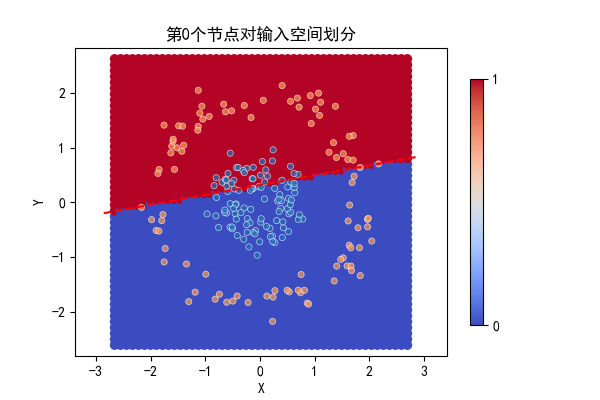

<IPython.core.display.Javascript object>


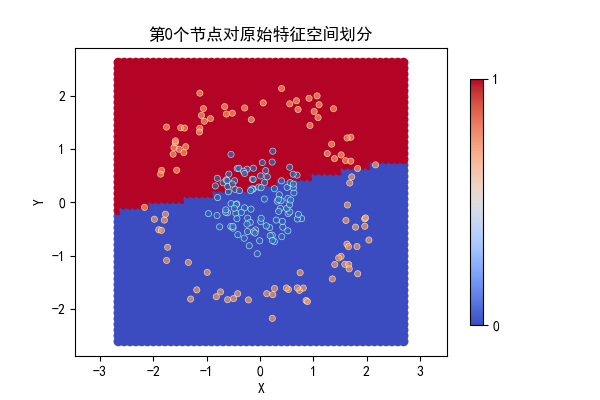

<IPython.core.display.Javascript object>


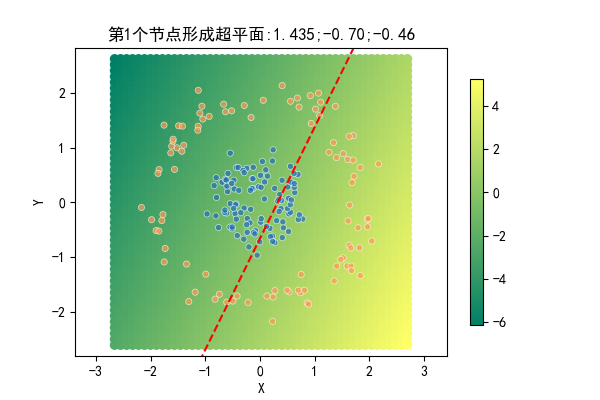

<IPython.core.display.Javascript object>


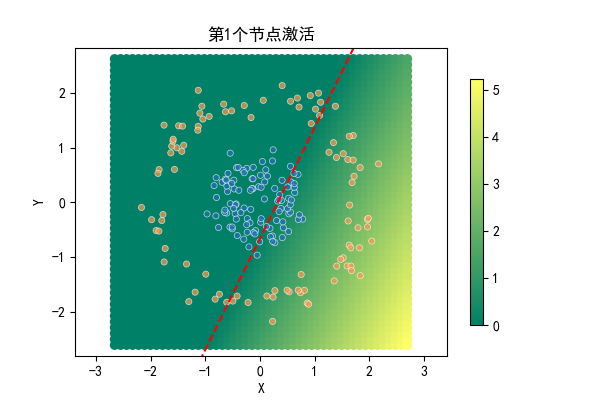

<IPython.core.display.Javascript object>


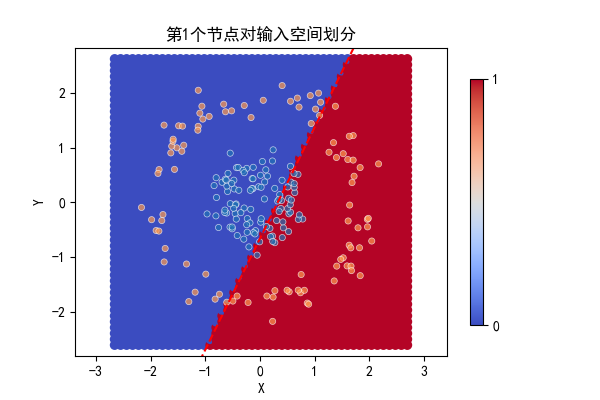

<IPython.core.display.Javascript object>


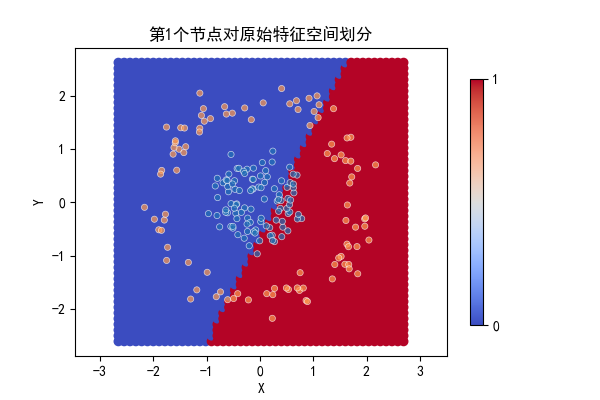

<IPython.core.display.Javascript object>


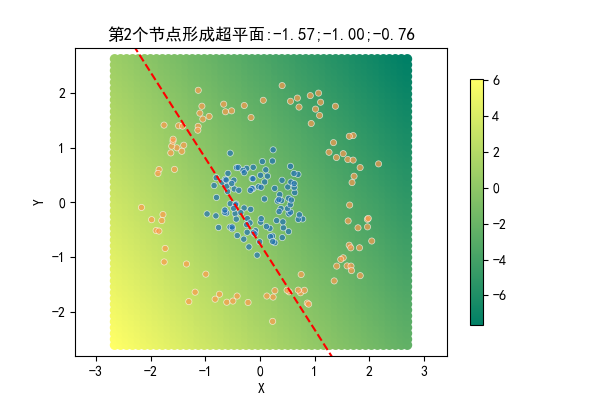

<IPython.core.display.Javascript object>


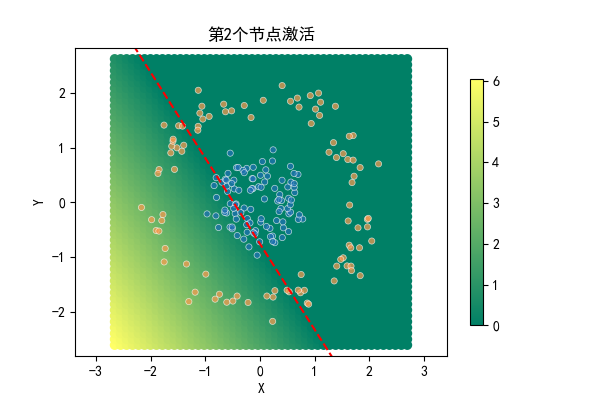

<IPython.core.display.Javascript object>


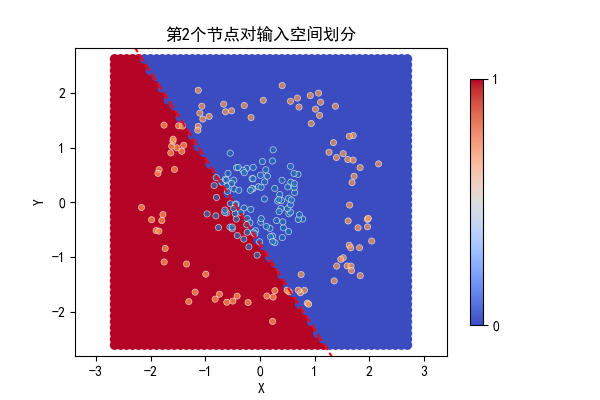

<IPython.core.display.Javascript object>


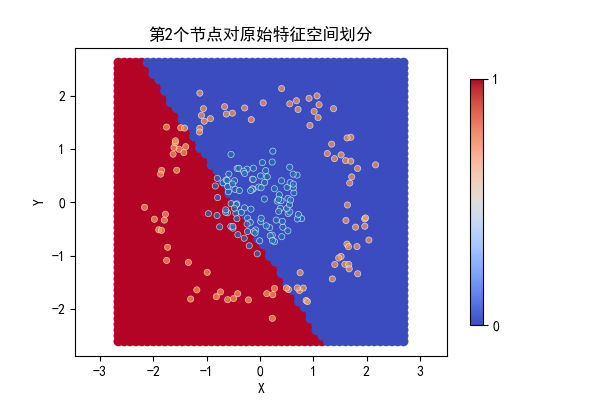

<IPython.core.display.Javascript object>


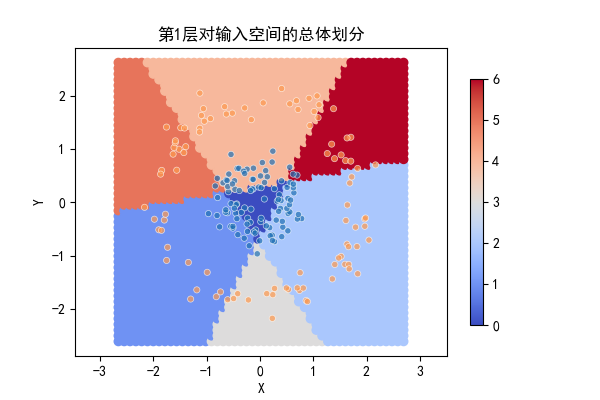

<IPython.core.display.Javascript object>


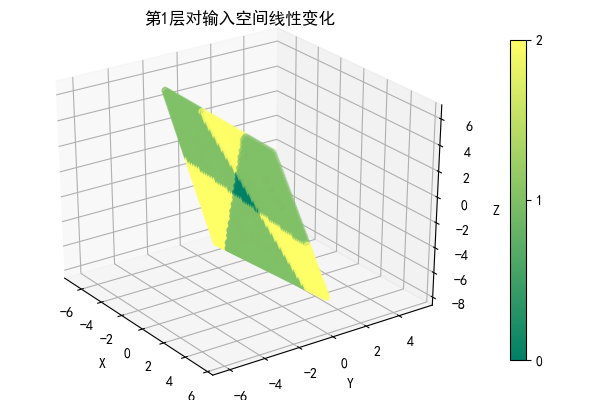

<IPython.core.display.Javascript object>


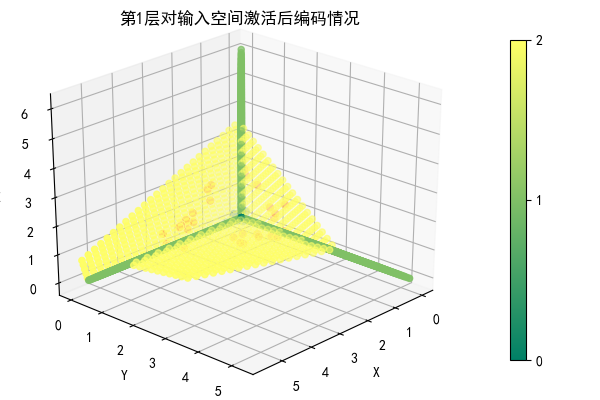

<IPython.core.display.Javascript object>


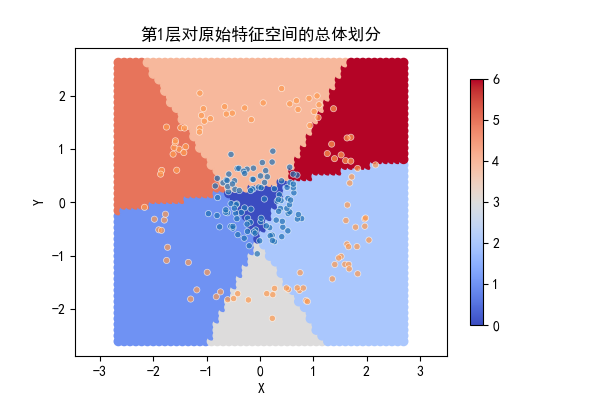

<IPython.core.display.Javascript object>


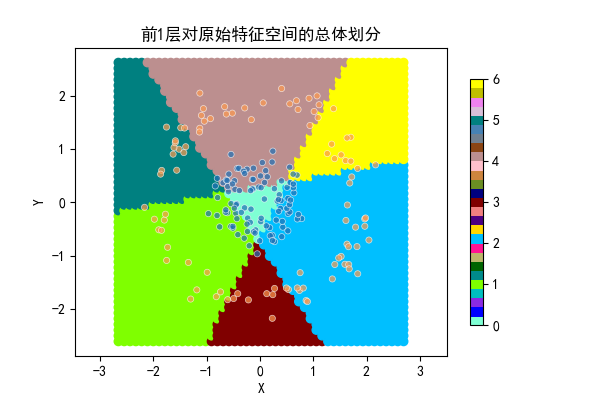

<IPython.core.display.Javascript object>


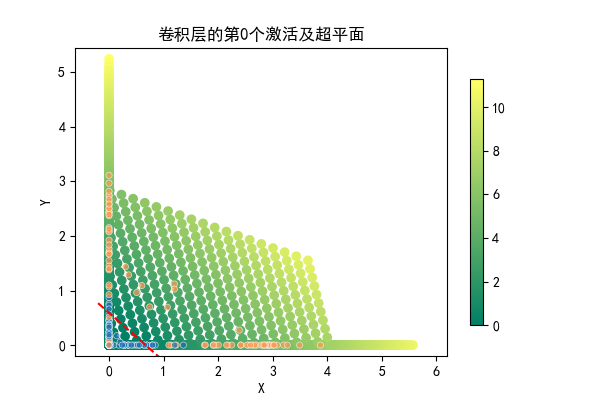

<IPython.core.display.Javascript object>


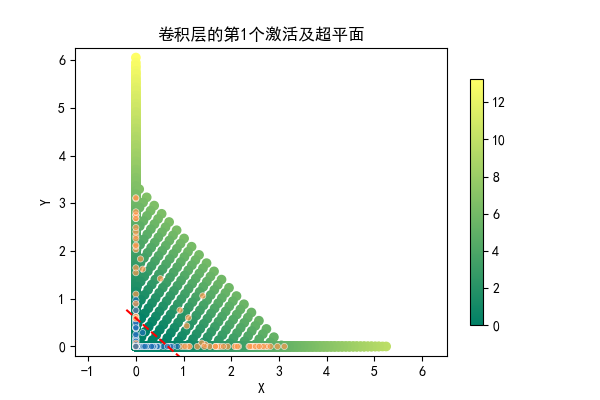

<IPython.core.display.Javascript object>


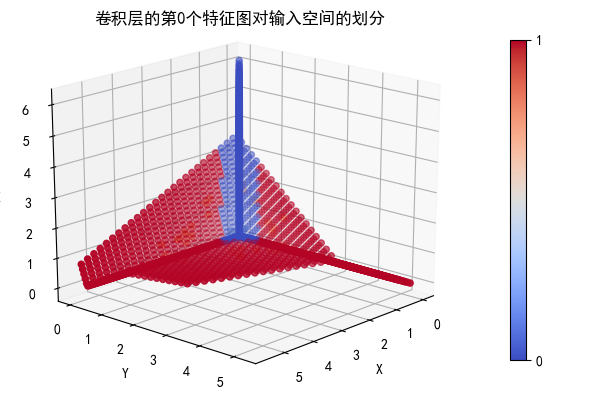

D:\anaconda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


<IPython.core.display.Javascript object>


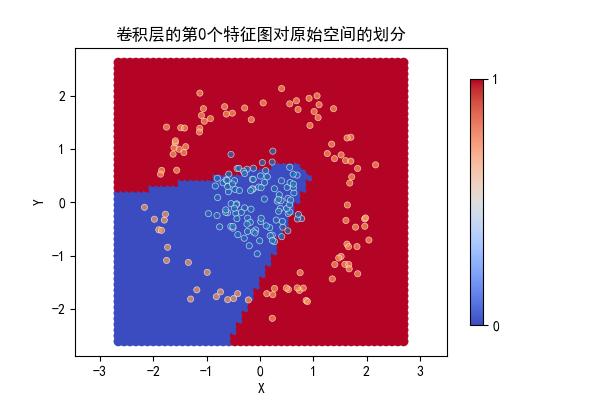

<IPython.core.display.Javascript object>


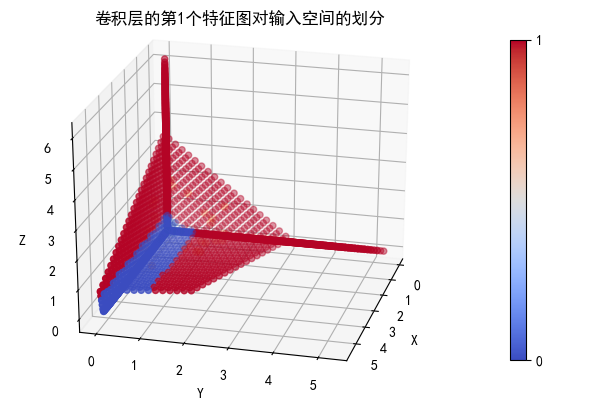

<IPython.core.display.Javascript object>


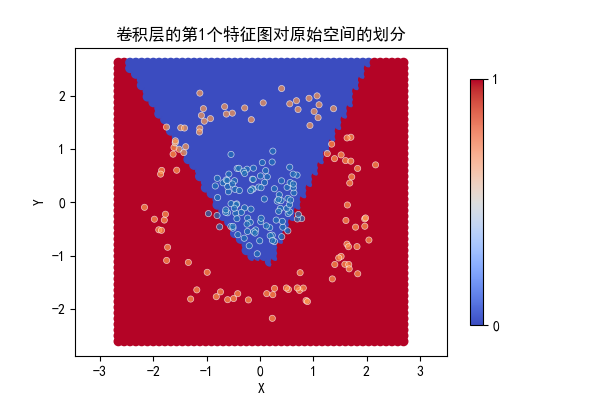

<IPython.core.display.Javascript object>


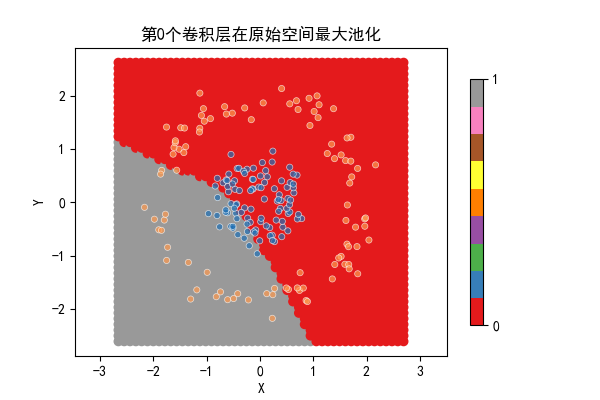

<IPython.core.display.Javascript object>


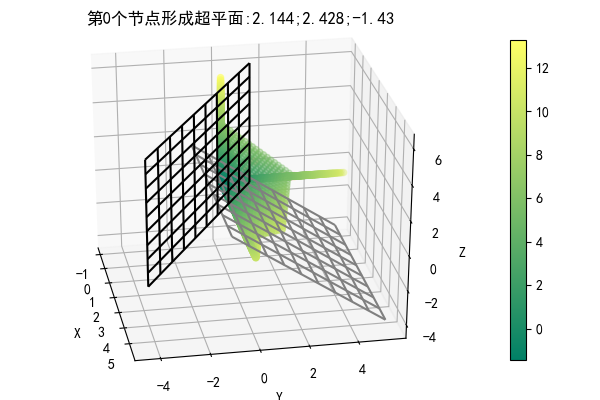

<IPython.core.display.Javascript object>


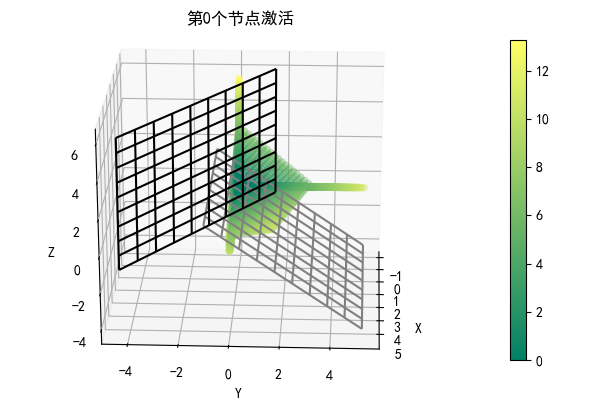

<IPython.core.display.Javascript object>


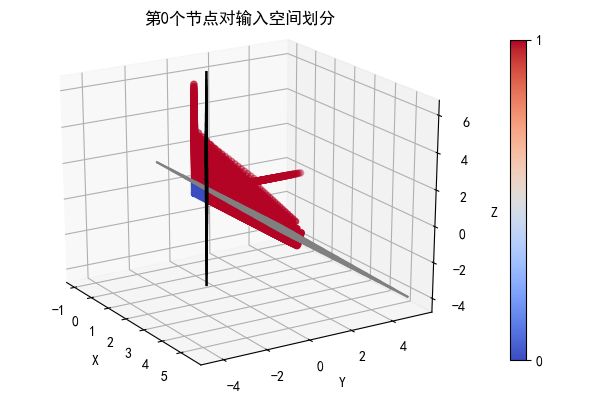

<IPython.core.display.Javascript object>


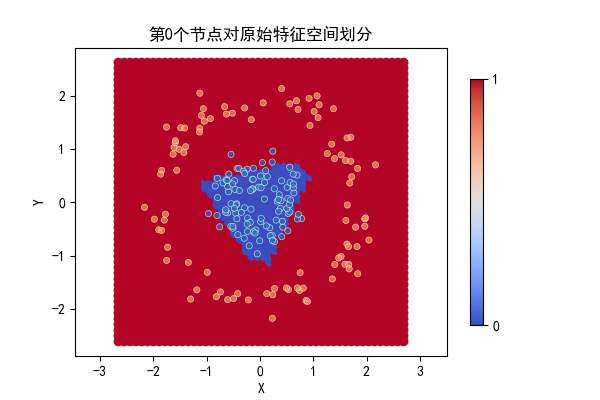

<IPython.core.display.Javascript object>


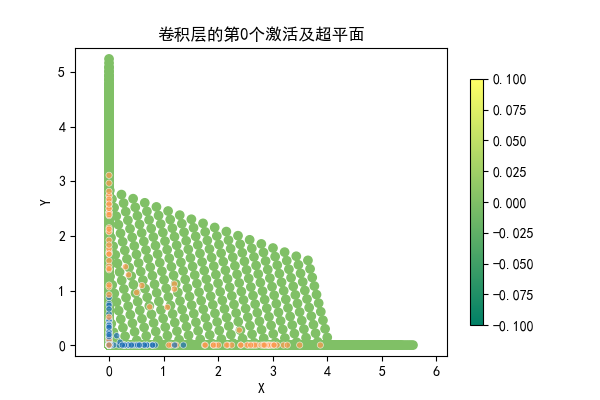

<IPython.core.display.Javascript object>


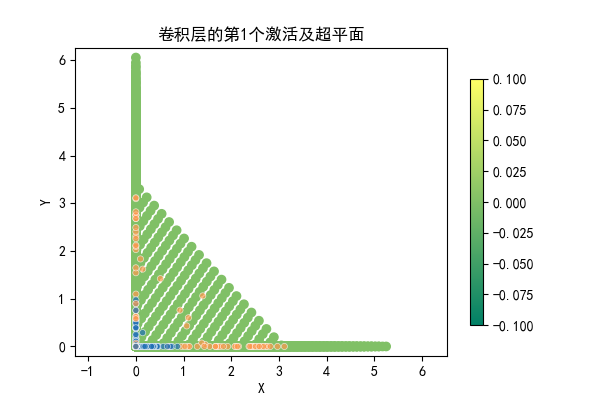

<IPython.core.display.Javascript object>


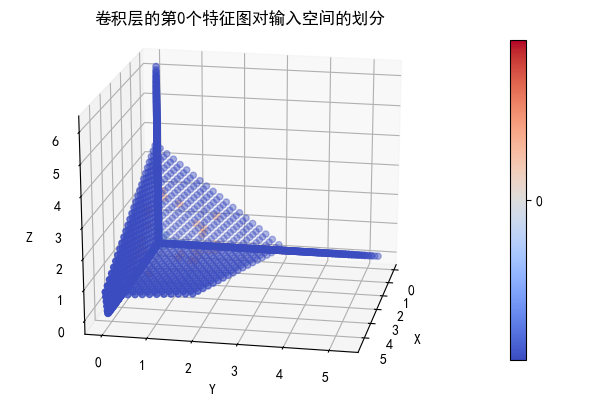

<IPython.core.display.Javascript object>


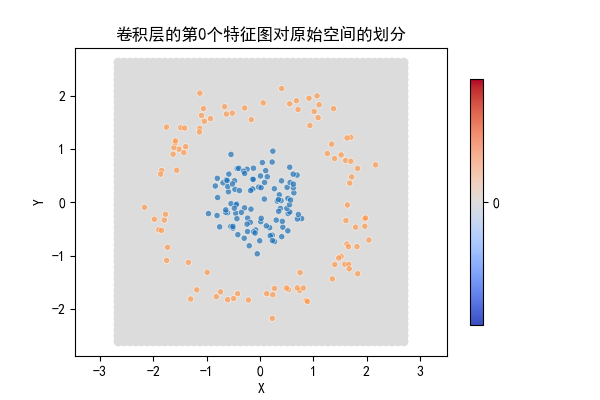

<IPython.core.display.Javascript object>


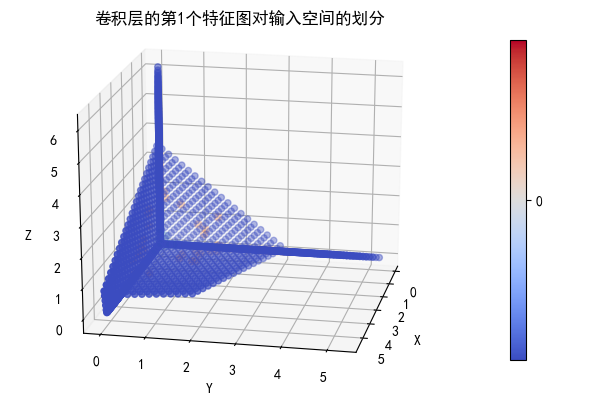

<IPython.core.display.Javascript object>


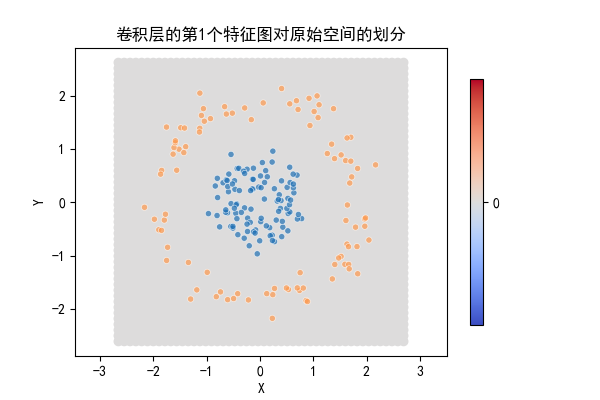

<IPython.core.display.Javascript object>


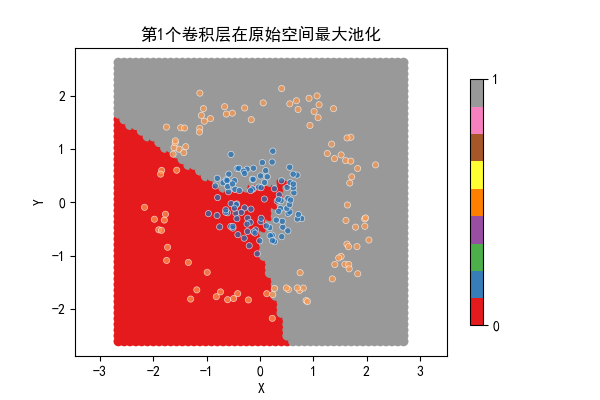

<IPython.core.display.Javascript object>


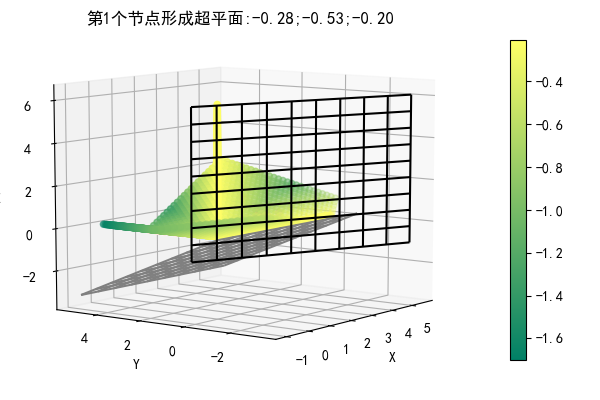

<IPython.core.display.Javascript object>


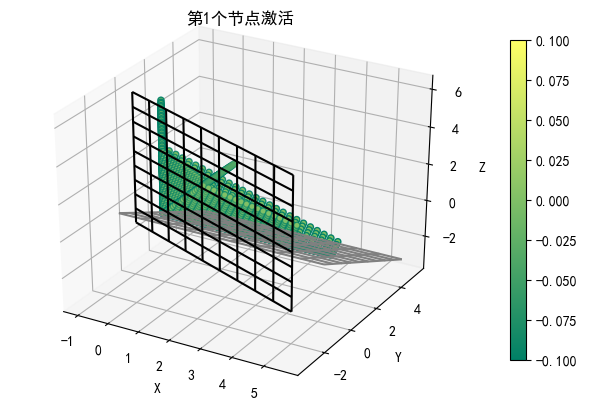

<IPython.core.display.Javascript object>


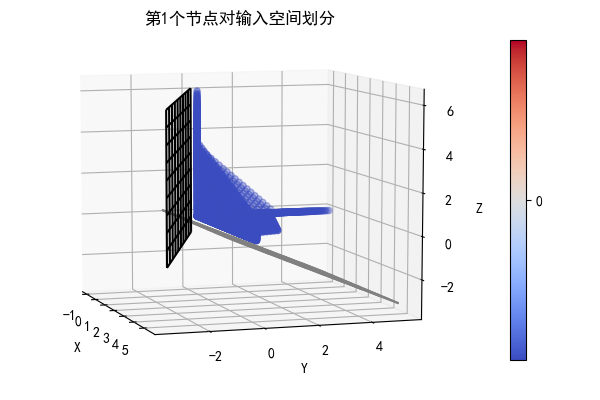

<IPython.core.display.Javascript object>


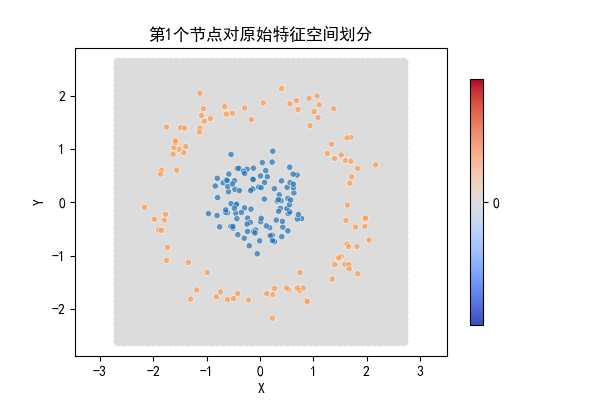

<IPython.core.display.Javascript object>


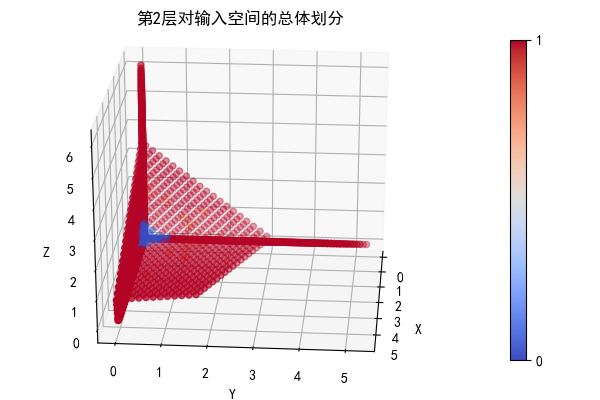

<IPython.core.display.Javascript object>


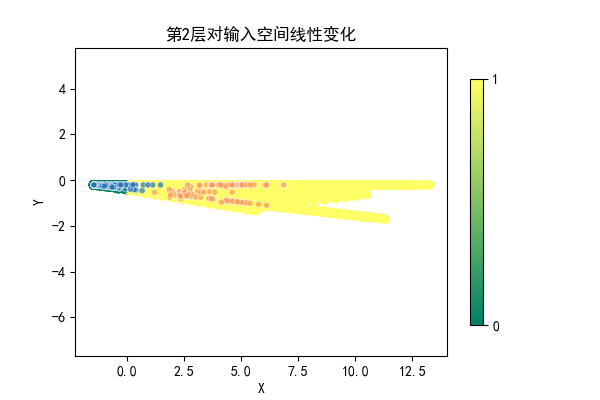

<IPython.core.display.Javascript object>


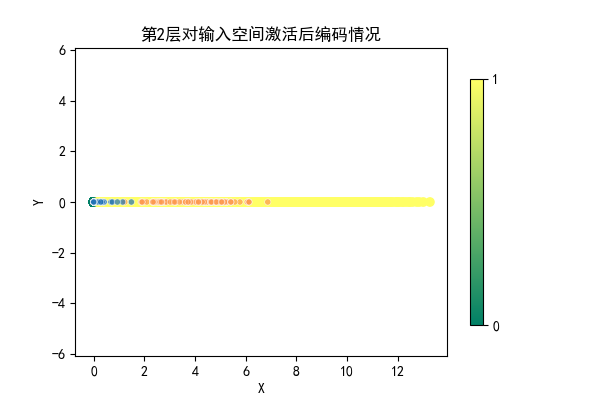

<IPython.core.display.Javascript object>


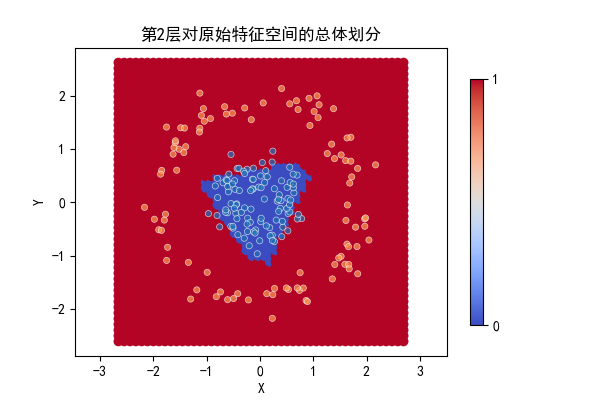

<IPython.core.display.Javascript object>


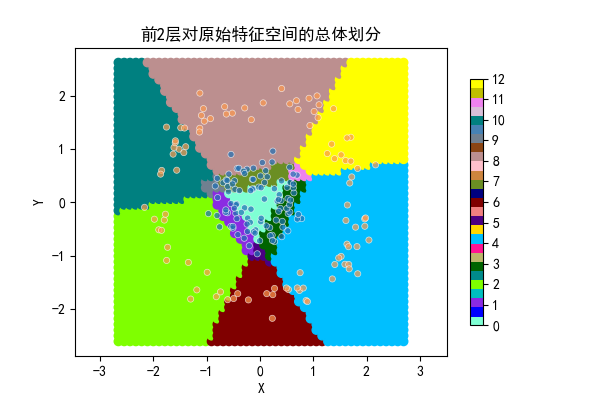

<IPython.core.display.Javascript object>


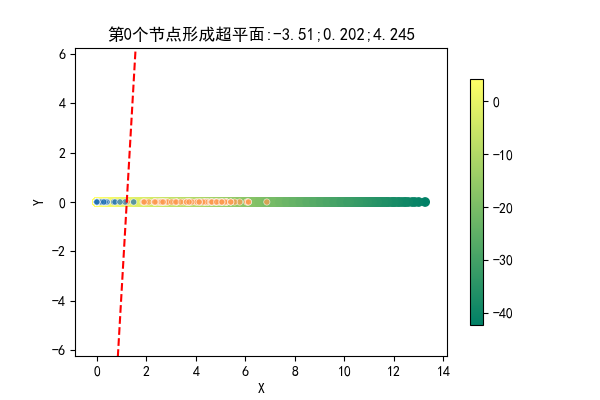

<IPython.core.display.Javascript object>


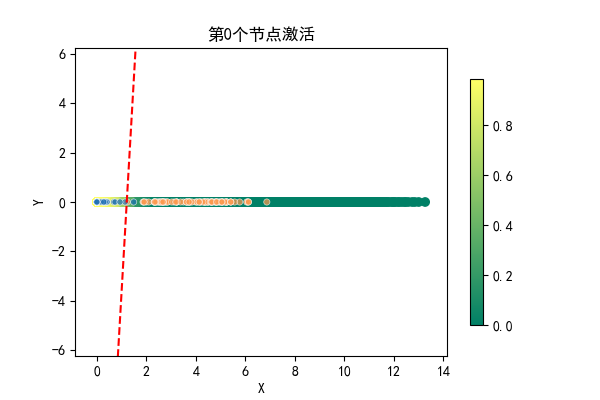

<IPython.core.display.Javascript object>


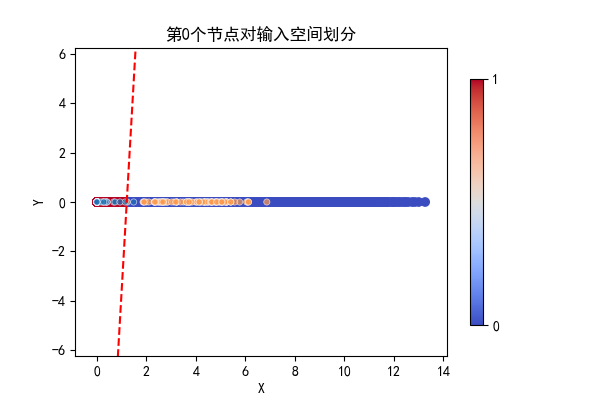

<IPython.core.display.Javascript object>


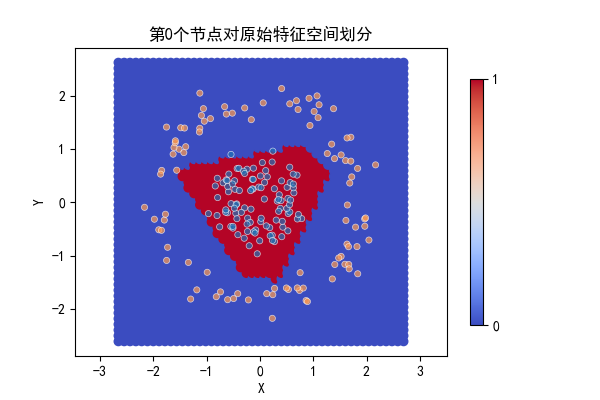

<IPython.core.display.Javascript object>


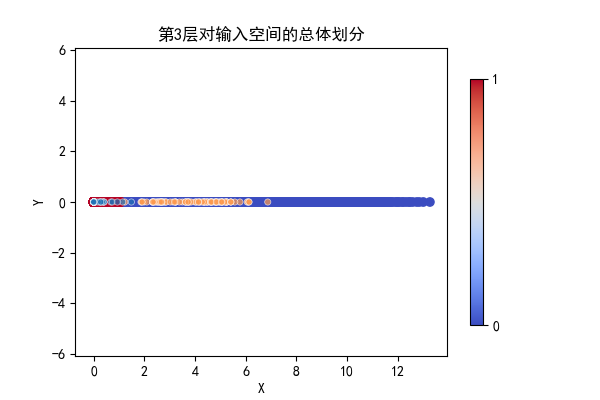

<IPython.core.display.Javascript object>


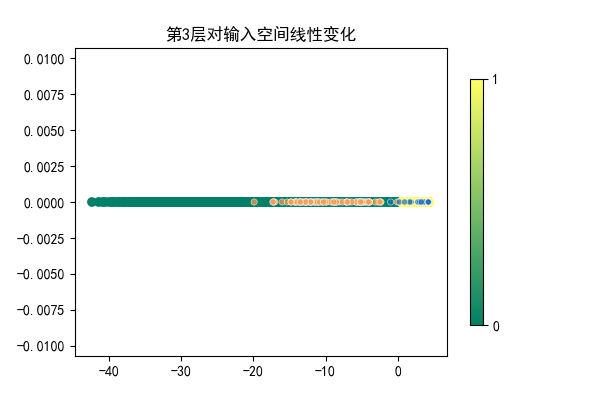

<IPython.core.display.Javascript object>


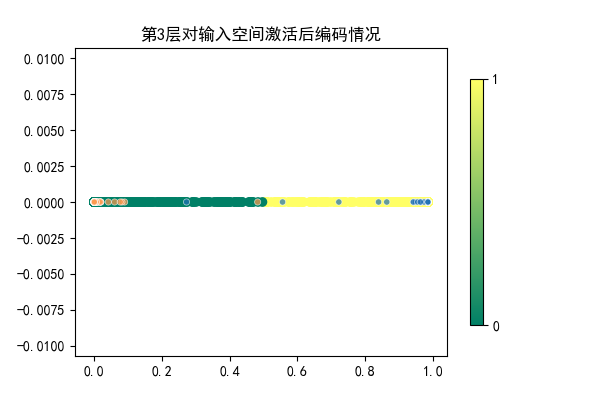

<IPython.core.display.Javascript object>


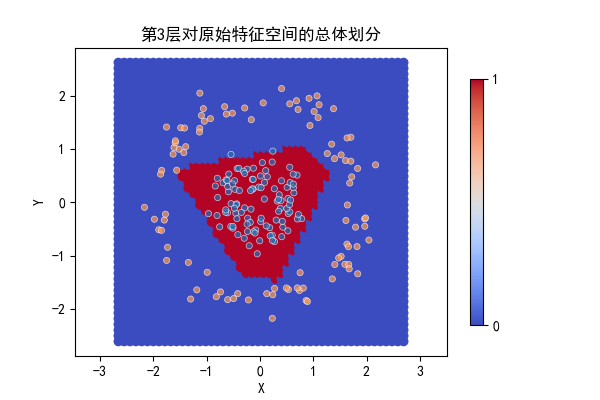

<IPython.core.display.Javascript object>


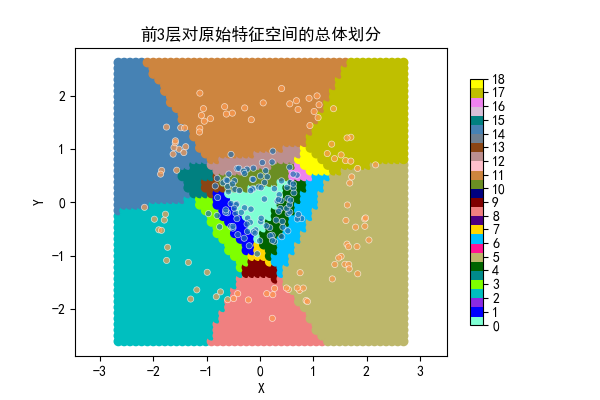

In [11]:
%matplotlib notebook
W,B = [w.T for w in net.weights],[b.squeeze(1) for b in net.biases]
actf = net.activation_fn.fn
X = X[:200]
y = y[:200]
# plt.close('all')
inV, inX = p_0, X
layersBinCode = None
for layer,(w, b) in enumerate(zip(W, B)):
    l_num =layer+1
    if net.layers_type[layer]=='FC':
        if l_num < len(W):
            activation = 'relu'
            actf = net.activation_fn.fn
            actf_P = net.activation_fn.prime
        else:
            activation = 'sigmoid'
            actf = network.sigmoid_activation.fn
            actf_P = network.sigmoid_activation.prime

        transV = inV @ w + b
        transX = inX @ w + b
        actV = actf(transV)
        actX = actf(transX)

        # 第k层各个节点的划分(第k层的二进制编码)
        if activation == 'relu':
            layerBinCode = np.where(actV > 0, 1, 0)
        elif activation == 'sigmoid':
            #         layerBinCode = actV
            layerBinCode = np.where(actV > 0.5, 1, 0)
        elif activation == 'tanh':
            layerBinCode = np.where(actV > 0, 1, 0)
    else:
        conv_size = net.sizes[layer+1]
        activation='relu'
        actf = net.activation_fn.fn
        transV_ = np.zeros((inV.shape[0],conv_size[0],conv_size[1]))
        transX_ = np.zeros((inX.shape[0],conv_size[0],conv_size[1]))
        for c_num in range(inV.shape[1]-conv_size[1]+1):
            transV_[:,:,c_num]=inV[:,c_num:c_num+conv_size[1]].reshape(-1,conv_size[1])@w+b
            transX_[:,:,c_num]=inX[:,c_num:c_num+conv_size[1]].reshape(-1,conv_size[1])@w+b
        actV_ = actf(transV_)
        actX_ = actf(transX_)
        actX_max_pooling = np.max(actX_,axis=2)
        actV_max_pooling = np.max(actV_,axis=2)
        actX_max_ind = np.argmax(transX_,axis=2)
        actV_max_ind = np.argmax(transV_,axis=2)
#         actX_max_ind = np.argmax(actX_,axis=2)
#         actV_max_ind = np.argmax(actV_,axis=2)
        # 第k层各个节点的划分(第k层的二进制编码)
        if activation == 'relu':
            layerBinCode = np.where(actV_max_pooling > 0, 1, 0)
            layerBinCode_noP = np.where(actV_>0, 1, 0)
        elif activation == 'sigmoid':
            layerBinCode = np.where(actV_max_pooling > 0.5, 1, 0)
            layerBinCode_noP = np.where(actV_>0.5,1,0)
        elif activation == 'tanh':
            layerBinCode = np.where(actV_max_pooling > 0, 1, 0)
        actX = actX_max_pooling
        actV = actV_max_pooling
#         print(np.min(actV))
        transX = np.squeeze([t_x[list(range(transX_.shape[1])),a_i] for t_x,a_i in zip(transX_,actX_max_ind)])
        transV = np.squeeze([t_v[list(range(transV_.shape[1])),a_i] for t_v,a_i in zip(transV_,actV_max_ind)])
        
            
    layerNumCode = mapping(layerBinCode)
    # 第k层的激活神经元的数量
    layerNumCode2 = np.sum(layerBinCode, 1)

    # 前k层的二进制编码
    layersBinCode = layerBinCode if layersBinCode is None else np.hstack((layersBinCode, layerBinCode))
    # 前k层的数字编码
    layersNumCode = mapping(layersBinCode)
    # 前k层激活神经元的数量
    layersNumCode2 = np.sum(layersBinCode, 1)

    n = actV.shape[-1]

    l = np.vstack((w, b)).T.astype('<U5').tolist()
    sl = [';'.join(z) for z in l]
    projIn = '3d' if inV.shape[-1] == 3 else None
    projOut = '3d' if transV.shape[-1] == 3 else None
    for i in range(n):
        # 在输入空间形成超平面
        if net.layers_type[layer]=='FC':
            w_draw  = w[:, i]
            b_draw = b[i]
        else:
            w_draw = np.append(w[:,i],0)
            b_draw = b[i]
            transV_noP = transV_[:,i]
            actV_noP = actV_[:,i]
            tranX_noP = transX_[:,i]
            actX_noP = actX_[:,i]
#             ax = scatter(inV,transV_noP.T[0],inX,(np.append(w[:,i],0),b[i]),cmap='summer')
#             ax.set_title("卷积层的第0个线性变化及超平面")
#             ax = scatter(inV,transV_noP.T[1],inX,(np.append(0,w[:,i]),b[i]),cmap='summer')
#             ax.set_title("卷积层的第1个线性变化及超平面")
#             ax = scatter(inV[:,:2],transV_noP.T[0],inX[:,:2],(w[:,i],b[i]),cmap='summer')
#             ax.set_title("卷积层的第0个线性变化及超平面")
#             ax = scatter(inV[:,1:3],transV_noP.T[1],inX[:,1:3],(w[:,i],b[i]),cmap='summer')
#             ax.set_title("卷积层的第1个线性变化及超平面")
            ax = scatter(inV[:,:2],actV_noP.T[0],inX[:,:2],(w[:,i],b[i]),cmap='summer')
            ax.set_title("卷积层的第0个激活及超平面")
            ax = scatter(inV[:,1:3],actV_noP.T[1],inX[:,1:3],(w[:,i],b[i]),cmap='summer')
            ax.set_title("卷积层的第1个激活及超平面")
            ax = scatter(inV,layerBinCode_noP[:,i,:].T[0,:],inX,cmap='coolwarm',value=False)
            ax.set_title("卷积层的第0个特征图对输入空间的划分")
            ax = scatter(p_0,layerBinCode_noP[:,i,:].T[0,:],X, cmap='coolwarm', value=False)
            ax.set_title("卷积层的第0个特征图对原始空间的划分")
            ax = scatter(inV,layerBinCode_noP[:,i,:].T[1,:],inX,cmap='coolwarm',value=False)
            ax.set_title("卷积层的第1个特征图对输入空间的划分")
            ax = scatter(p_0,layerBinCode_noP[:,i,:].T[1,:],X,cmap='coolwarm',value=False)
            ax.set_title("卷积层的第1个特征图对原始空间的划分")
            
#             ax = scatter(inV,actV_max_ind.T[i],inX,cmap='rainbow',value=False)
#             ax.set_title('第%d个卷积层在输入空间最大池化'%(i))
            ax = scatter(p_0,actV_max_ind.T[i],X,cmap='Set1',value=False)
            ax.set_title('第%d个卷积层在原始空间最大池化'%(i))
        ax = scatter(inV, transV.T[i], inX, (w_draw, b_draw), cmap='summer')
        if net.layers_type[layer]=='C':
            add_hyperplane(ax,inV,(np.append(0,w[:,i]),b[i]))
        ax.set_title('第%d个节点形成超平面:' % (i) + str(sl[i]))
        # 后层每个节点对输入空间进行激活的值
        ax = scatter(inV, actV.T[i], inX, (w_draw, b_draw), cmap='summer')
        if net.layers_type[layer]=='C':
            add_hyperplane(ax,inV,(np.append(0,w[:,i]),b[i]))
        ax.set_title('第%d个节点激活' % (i))
        # 后层每个节点对输入空间的划分
        ax = scatter(inV, layerBinCode.T[i], inX, (w_draw, b_draw), cmap='coolwarm', value=False,zero_start=False)
        if net.layers_type[layer]=='C':
            add_hyperplane(ax,inV,(np.append(0,w[:,i]),b[i]))
        ax.set_title('第%d个节点对输入空间划分' % (i))
        # 在原始特征空间进行划分
        ax = scatter(p_0, layerBinCode.T[i], X, cmap='coolwarm', value=False,zero_start=False)
        ax.set_title('第%d个节点对原始特征空间划分' % (i))
        
                          

    ax = scatter(inV, layerNumCode, inX, value=False,cmap='coolwarm')
    ax.set_title('第%d层对输入空间的总体划分' % (l_num))
    # 输入空间进行仿射变换后在后层空间中的情况
    ax = scatter(transV, layerNumCode2, transX, cmap='summer', value=False, zero_start=False)
    ax.set_title('第%d层对输入空间线性变化' % (l_num))
    # 输入空间在进行非线性变换后在后层空间中的情况
    ax = scatter(actV, layerNumCode2, actX, cmap='summer', value=False, zero_start=False)
    ax.set_title('第%d层对输入空间激活后编码情况' % (l_num))
    # 第k层对原始特征空间的总体划分（叠加？）
    ax = scatter(p_0, layerNumCode, X, value=False,zero_start=False,cmap='coolwarm')
    ax.set_title('第%d层对原始特征空间的总体划分' % (l_num))
    # 前k层对原始特征空间胞腔分解情况(叠加？)
    ax = scatter(p_0, layersNumCode, X, value=False, zero_start=False,cmap=cmap)
    ax.set_title('前%d层对原始特征空间的总体划分' % (l_num))

    inX = actX
    inV = actV
    plt.show();